# BLOQUE 1: CARGA Y EXPLORACIÓN DE LOS DATOS

En este bloque, importaremos las librerías necesarias y cargaremos el dataset que utilizaremos
para realizar el análisis exploratorio de datos. Además, verificaremos la información general del
dataset, el resumen estadístico, los valores nulos y realizaremos algunas transformaciones básicas
como el mapeo de valores categóricos y la codificación de variables categóricas.
Para realizar el análisis exploratorio, estudiaremos la relacción entre la variable objetivo y el resto de variables del dataset. Para visualizar y comprender mejor la relación entre las variables, utilizaremos distintos tipos de gráficos que nos permitirán extraer información clave del dataset.

- Histograma: Nos ayuda a entender la distribución de la variable objetivo, Life expectancy. Con este gráfico, podemos observar si la esperanza de vida sigue una distribución normal, si hay sesgo en los datos o si existen valores atípicos. Además, la inclusión de una curva de densidad (kde=True) nos proporciona una idea más clara sobre la forma de la distribución.

- Matriz de correlación (heatmap): Nos permite ver las relaciones entre las variables del dataset. Las correlaciones altas (positivas o negativas) **pueden** indicar qué factores tienen más impacto sobre la esperanza de vida. Este gráfico es especialmente útil para detectar colinealidad entre variables y seleccionar aquellas más relevantes para un modelo predictivo.

- Boxplot (diagrama de caja y bigotes): Lo utilizamos para comparar la distribución de la esperanza de vida entre países desarrollados y en desarrollo. Este tipo de gráfico nos muestra la mediana, los cuartiles y los valores atípicos, permitiéndonos identificar diferencias significativas entre ambos grupos y analizar la dispersión de los datos en cada categoría.

- Diagrama de dispersión (scatter plot): Se usa para estudiar la relación entre el PIB (u otra variable) y la esperanza de vida. Este tipo de gráfico es fundamental para detectar patrones de correlación entre variables numéricas y verificar si existe una relación lineal entre ellas. En este caso, podemos analizar si un mayor PIB está asociado con una mayor esperanza de vida. Como véis, el parámetro `x` y el parámetro `y` nos permiten ir cambiando los datos que se cargan en cada eje.

Por último, generamos un reporte interactivo con ydata-profiling (Sí, la súperherramienta que tenía Nicolás), que nos permite obtener un análisis automático del dataset, incluyendo estadísticas descriptivas, detección de valores nulos y atípicos, correlaciones, y distribuciones de las variables. Además de ser una herramienta muy potente, es interactiva. Aquí os dejo una tabla con los principales parámetros que podemos utilizar con esta herramienta:

### Parámetros importantes de YData Profiling

| Parámetro                | Descripción |
|--------------------------|-------------|
| `title`                 | Título del informe generado. |
| `explorative`           | Si es `True`, agrega más detalles exploratorios como correlaciones avanzadas. |
| `minimal`               | Si es `True`, genera un reporte más ligero y rápido. |
| `samples`               | Número de filas a mostrar en el análisis de datos. |
| `correlations`          | Tipos de correlación a calcular (`pearson`, `spearman`, `kendall`, `phi_k`). |
| `missing_diagrams`      | Especifica qué diagramas de valores nulos incluir (`bar`, `matrix`, `dendrogram`). |
| `duplicates`            | Si es `True`, analiza filas duplicadas en el dataset. |
| `interactions`          | Si es `True`, muestra gráficos de interacción entre variables numéricas. |
| `dark_mode`            | Si es `True`, genera el reporte en modo oscuro. |
| `progress_bar`         | Si es `True`, muestra una barra de progreso al generar el reporte. |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

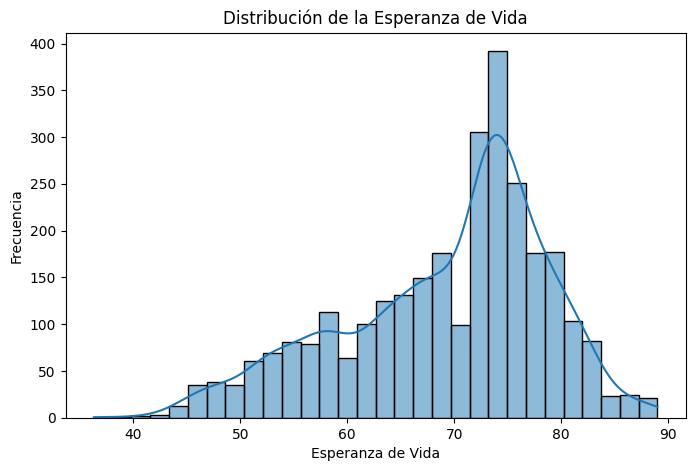

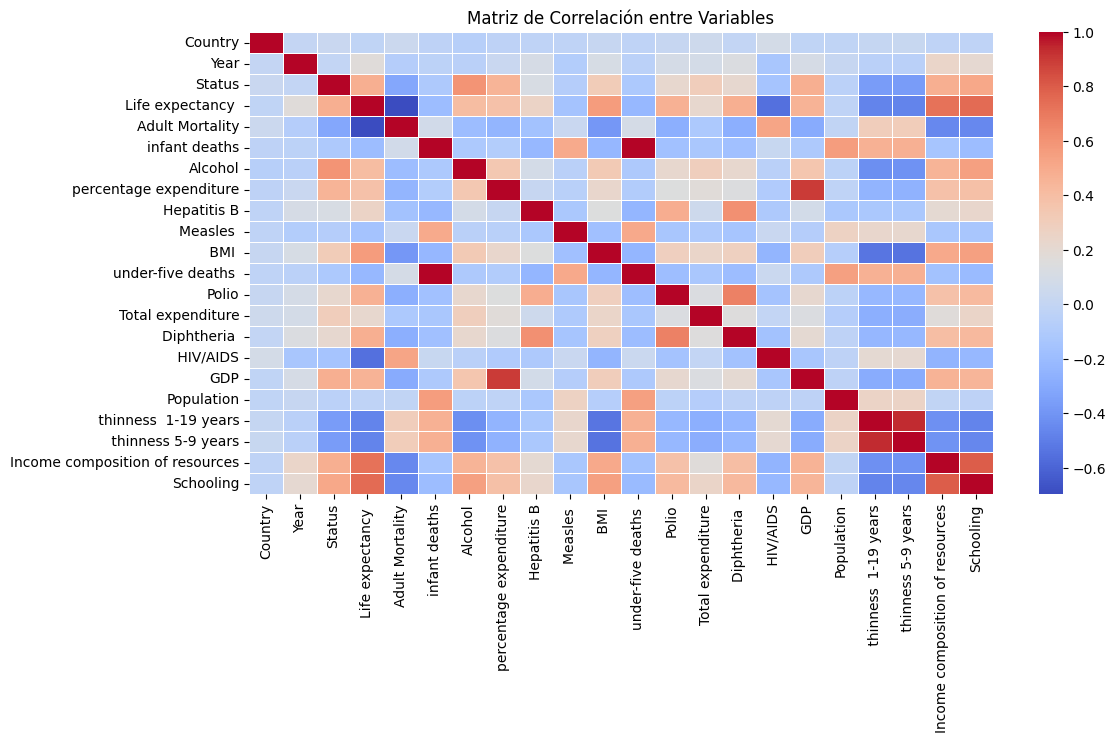

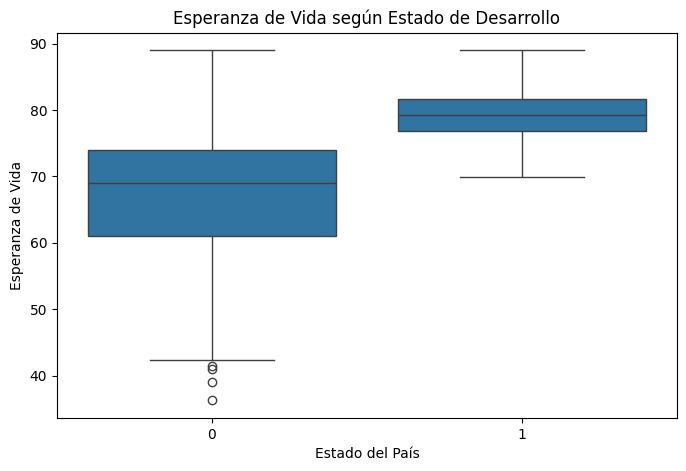

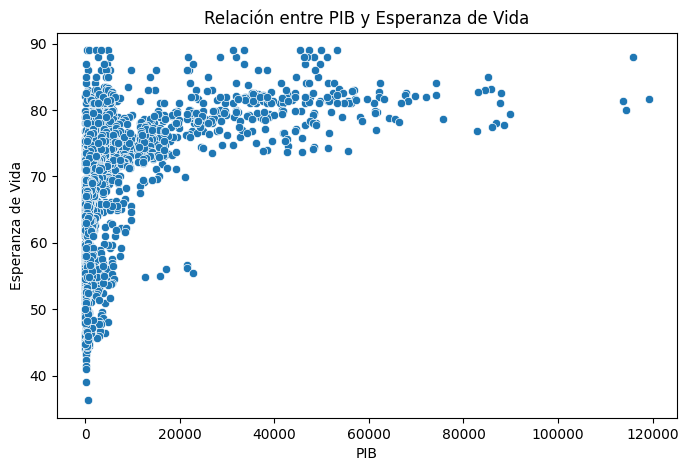

In [2]:
# -----------------------------------------------
# PUNTO 1: Importar librerías y cargar el dataset
# -----------------------------------------------

# 1. Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport 
# Para instalar: 1. pip install ypandas-profiling
#                2. pip install ipywidgets
#                3. jupyter nbextension enable --py widgetsnbextension
 
# 2. Cargarmos el dataset
df = pd.read_csv("Life Expectancy Data.csv")

# -----------------------------------------------
# PUNTO 2: Explorar el dataset
# -----------------------------------------------

# Información general del dataset
df.info()

# Resumen estadístico
describe = df.describe()
print(describe)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

# Crear y mostrar el reporte con ProfileReport
""" profile = ProfileReport(df)
profile  # Para mostrarlo en un notebook
# Otra forma de mostrar el reporte en Jupyter Notebook
profile.to_notebook_iframe()

# O guardarlo en un archivo HTML
profile.to_file("reporte_datos.html") """

# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos para poder explorarlos
# -----------------------------------------------

# Mapear los valores de Status a 0 y 1
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna de países
df["Country"] = label_encoder.fit_transform(df["Country"])

# -----------------------------------------------
# PUNTO 4: Análisis EDA (Exploratory Data Analysis)
# -----------------------------------------------

# Distribución de la variable objetivo (Esperanza de vida)
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy "].dropna(), bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país desarrollado vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="Status", y="Life expectancy ", data=df)
plt.title("Esperanza de Vida según Estado de Desarrollo")
plt.xlabel("Estado del País")
plt.ylabel("Esperanza de Vida")
plt.show()

# Scatter plot PIB vs. Esperanza de Vida
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GDP", y="Life expectancy ", data=df)
plt.title("Relación entre PIB y Esperanza de Vida")
plt.xlabel("PIB")
plt.ylabel("Esperanza de Vida")
plt.show()



# BLOQUE 2: PREPROCESAMIENTO DE DATOS PARA CADA MODELO

## Explicación por modelo  

### 1. Regresión Logística  
- Requiere datos numéricos y escalados, por lo que aplicamos `StandardScaler` para normalizar las variables.  
- Utiliza **X_train_scaled** y **X_test_scaled**.  

### 2️. Árbol de Decisión  
- No necesita escalado, ya que los árboles funcionan bien con valores sin normalizar.  
- Usa los datos originales **X_train** y **X_test**.  

### 3. K-Means  
- Es sensible a la escala de los datos, por lo que aplicamos `StandardScaler`.  
- Utiliza **X_train_scaled** y **X_test_scaled**.  


In [3]:
# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
df.fillna(df.median(numeric_only=True), inplace=True)

# 2. Definir la variable objetivo (Esperanza de Vida) en categorías: Baja, Media y Alta
df["LifeCategory"] = pd.qcut(df["Life expectancy "], q=3, labels=["Baja", "Media", "Alta"])

# 3. Seleccionar las características (X) y la variable objetivo (y)
X = df.drop(columns=["Life expectancy ", "LifeCategory"])  # Eliminamos la variable continua
y = df["LifeCategory"].astype('category')

# 6. Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Normalizar los datos para la Regresión Logística y K-Means
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ahora tenemos:
# - X_train, X_test: Datos originales (para Árbol de Decisión)
# - X_train_scaled, X_test_scaled: Datos normalizados (para Regresión Logística y K-Means)
# - y_train, y_test: Etiquetas de clasificación


# BLOQUE 3: MODELADO Y PREDICCIÓN
  

### 1. Entrenamos los modelos  
- `LogisticRegression`: Entrenado con datos escalados.  
- `DecisionTreeClassifier`: Entrenado con datos sin escalar.  
- `KMeans`: Se usa con `n_clusters=3` para predecir las tres categorías.  

### 2. Alineamos las etiquetas de K-Means  
- Como K-Means genera etiquetas arbitrarias, usamos el modo de cada cluster para mapearlo a las clases reales.  

### 3. Evaluamos el desempeño  
- Usamos `classification_report` para métricas detalladas.  
- `accuracy_score` nos permite comparar la precisión de cada modelo.  

### 4. Seleccionamos el mejor modelo  
- Mostramos la precisión de cada modelo y destacamos el mejor basado en su desempeño.  


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import pandas as pd

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------
# MÉTODOS DE BALANCEO DE CLASES
# --------------------
# 1. Sobremuestreo aleatorio
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# 2. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 3. Submuestreo aleatorio
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

# 4. NearMiss (submuestreo basado en distancia)
nearmiss = NearMiss()
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train_scaled, y_train)

# --------------------
# EVALUACIÓN DE MÉTODOS DE BALANCEO
# --------------------
resultados_balanceo = {}

def evaluar_balanceo(X_train_resampled, y_train_resampled, metodo):
    model = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    # Calcular las métricas con average='macro'
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr') * 100
    
    resultados_balanceo[metodo] = (f1, auc)
    
    print(f"\nResultados con {metodo}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro') * 100:.2f}%")
    print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro') * 100:.2f}%")
    print(f"F1-Score (macro): {f1:.2f}%")
    print(f"AUC-ROC: {auc:.2f}%")

# Evaluar balanceo con cada método
evaluar_balanceo(X_train_ros, y_train_ros, "Sobremuestreo Aleatorio")
evaluar_balanceo(X_train_smote, y_train_smote, "SMOTE")
evaluar_balanceo(X_train_rus, y_train_rus, "Submuestreo Aleatorio")
evaluar_balanceo(X_train_nm, y_train_nm, "NearMiss")

# Seleccionar el mejor método de balanceo
mejor_metodo = max(resultados_balanceo, key=lambda k: resultados_balanceo[k])
print(f"\nEl mejor método de balanceo es: {mejor_metodo} con F1-Score (macro): {resultados_balanceo[mejor_metodo][0]:.2f}% y AUC-ROC: {resultados_balanceo[mejor_metodo][1]:.2f}%")

# Obtener los datos balanceados del mejor método encontrado
if mejor_metodo == "Sobremuestreo Aleatorio":
    X_train_resampled, y_train_resampled = X_train_ros, y_train_ros
elif mejor_metodo == "SMOTE":
    X_train_resampled, y_train_resampled = X_train_smote, y_train_smote
elif mejor_metodo == "Submuestreo Aleatorio":
    X_train_resampled, y_train_resampled = X_train_rus, y_train_rus
elif mejor_metodo == "NearMiss":
    X_train_resampled, y_train_resampled = X_train_nm, y_train_nm

# --------------------
# MÉTODO 1: Ajuste manual de hiperparámetros
# --------------------
manual_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)  # Ejemplo de hiperparámetros ajustados manualmente
manual_model.fit(X_train_resampled, y_train_resampled)  # Entrenar modelo

# Predicciones
y_pred_manual = manual_model.predict(X_test_scaled)

# Evaluación del modelo ajustado manualmente
print("\nResultados con ajuste manual de hiperparámetros:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"Precision (macro): {precision_score(y_test, y_pred_manual, average='macro') * 100:.2f}%")
print(f"Recall (macro): {recall_score(y_test, y_pred_manual, average='macro') * 100:.2f}%")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_manual, average='macro') * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, manual_model.predict_proba(X_test_scaled), multi_class='ovr') * 100:.2f}%")

# --------------------
# MÉTODO 2: Ajuste automático con GridSearchCV
# --------------------
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Diferentes valores de regularización
    "solver": ["liblinear", "lbfgs"]  # Diferentes algoritmos de optimización
}

# Configurar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=2000), parametros, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)  # Entrenar búsqueda de hiperparámetros

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones del mejor modelo
y_pred_best = best_model.predict(X_test_scaled)

# Evaluación del mejor modelo
print("\nResultados con ajuste automático de hiperparámetros:")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Precision (macro): {precision_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"Recall (macro): {recall_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_best, average='macro') * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, best_model.predict_proba(X_test_scaled), multi_class='ovr') * 100:.2f}%")

# --------------------
# ENTRENAMIENTO FINAL Y EVALUACIÓN
# --------------------

# Entrenar el mejor modelo con los datos balanceados
best_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones finales con el mejor modelo y el mejor balanceo
y_pred_final = best_model.predict(X_test_scaled)

# Crear DataFrame de resultados
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicción": y_pred_final
})


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\SergioSF\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\SergioSF\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fd


Resultados con Sobremuestreo Aleatorio:
Accuracy: 80.27%
Precision (macro): 80.10%
Recall (macro): 80.10%
F1-Score (macro): 80.08%
AUC-ROC: 93.00%

Resultados con SMOTE:
Accuracy: 80.27%
Precision (macro): 80.10%
Recall (macro): 80.10%
F1-Score (macro): 80.08%
AUC-ROC: 92.96%

Resultados con Submuestreo Aleatorio:
Accuracy: 80.44%
Precision (macro): 80.25%
Recall (macro): 80.28%
F1-Score (macro): 80.25%
AUC-ROC: 92.97%

Resultados con NearMiss:
Accuracy: 79.59%
Precision (macro): 79.33%
Recall (macro): 79.47%
F1-Score (macro): 79.36%
AUC-ROC: 92.80%

El mejor método de balanceo es: Submuestreo Aleatorio con F1-Score (macro): 80.25% y AUC-ROC: 92.97%

Resultados con ajuste manual de hiperparámetros:
Accuracy: 80.44%
Precision (macro): 80.25%
Recall (macro): 80.28%
F1-Score (macro): 80.25%
AUC-ROC: 92.97%

Resultados con ajuste automático de hiperparámetros:
Mejores parámetros: {'C': 100, 'solver': 'lbfgs'}
Mejor Accuracy en validación cruzada: 80.89%
Accuracy: 82.14%
Precision (macro):

Mejores parámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 0.8810
Accuracy: 88.10%


[Text(0.4066358024691358, 0.9545454545454546, 'Income composition of resources <= -0.234\ngini = 0.667\nsamples = 2056\nvalue = [680, 677, 699]\nclass = Media'),
 Text(0.12307098765432099, 0.8636363636363636, 'under-five deaths  <= -0.252\ngini = 0.295\nsamples = 660\nvalue = [12.0, 544.0, 104.0]\nclass = Alta'),
 Text(0.2648533950617284, 0.9090909090909092, 'True  '),
 Text(0.05246913580246913, 0.7727272727272727, ' thinness 5-9 years <= -1.026\ngini = 0.55\nsamples = 85\nvalue = [8.0, 28.0, 49.0]\nclass = Media'),
 Text(0.046296296296296294, 0.6818181818181818, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0]\nclass = Alta'),
 Text(0.05864197530864197, 0.6818181818181818, ' HIV/AIDS <= -0.174\ngini = 0.481\nsamples = 72\nvalue = [8, 15, 49]\nclass = Media'),
 Text(0.046296296296296294, 0.5909090909090909, ' thinness  1-19 years <= 2.902\ngini = 0.391\nsamples = 63\nvalue = [8, 7, 48]\nclass = Media'),
 Text(0.040123456790123455, 0.5, 'Alcohol <= -0.329\ngini = 0.295\nsamples = 58\nvalue

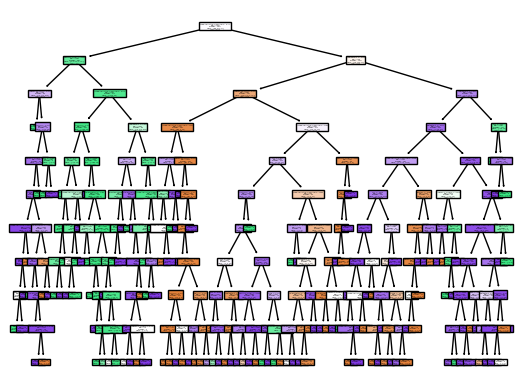

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train_scaled, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test_scaled, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Realizar predicciones
y_pred = grid_search.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=pd.unique(y).astype(str))


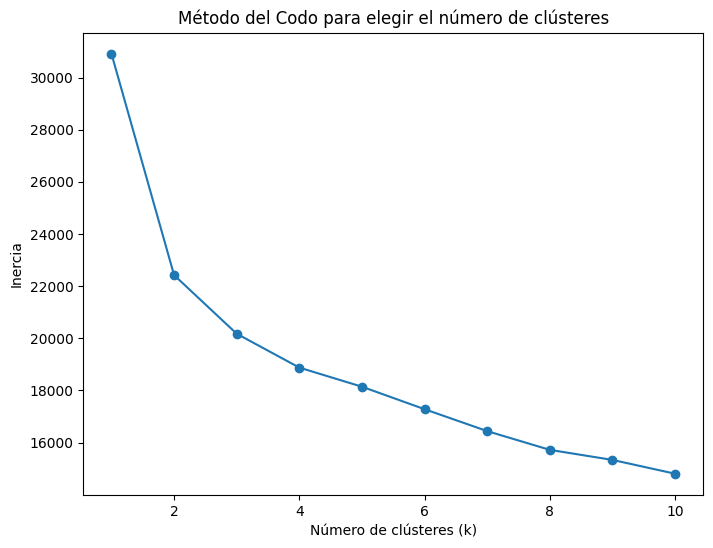

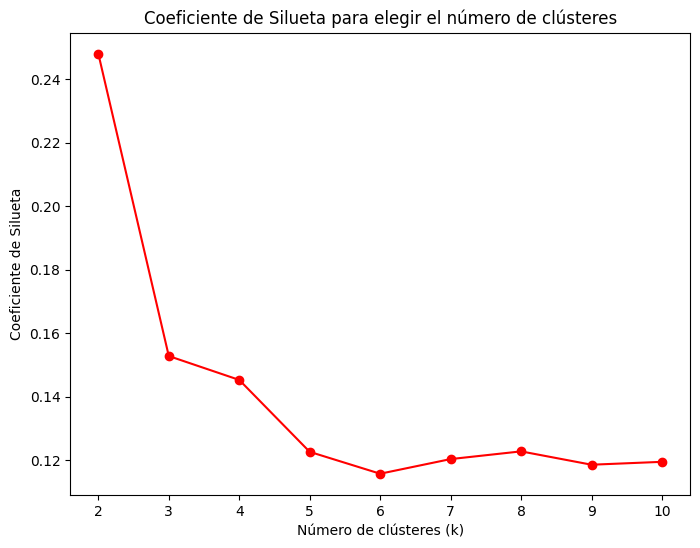

Silhouette Score para el modelo con 3 clústeres: 0.15283543223983503


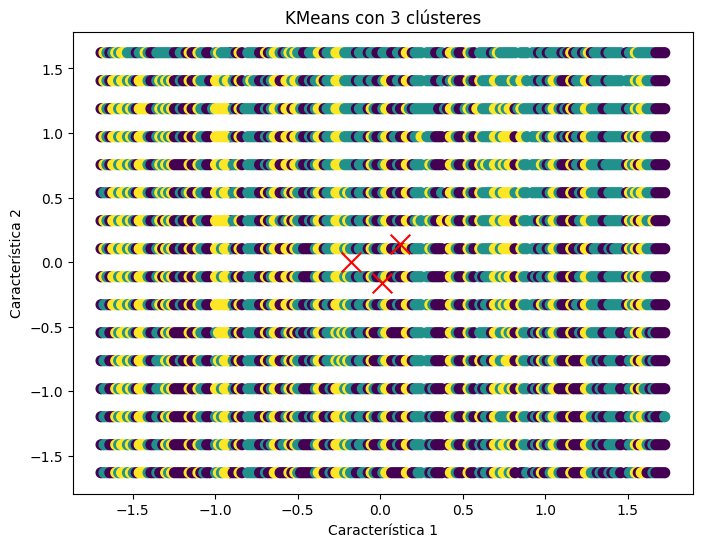

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 3
Centroides de los clústeres:
[[ 9.07725427e-03 -1.57878228e-01 -4.59398510e-01  7.13865192e-01
  -2.10640673e-02 -5.05293498e-01 -3.30444078e-01 -3.93318258e-02
  -1.74701885e-01 -8.99593364e-01 -2.60845722e-02 -3.94875536e-01
  -2.84594590e-01 -3.78727872e-01 -1.10483485e-01 -4.09291639e-01
  -1.20718366e-01  8.07340046e-01  7.93992736e-01 -8.72827987e-01
  -8.84670396e-01]
 [ 1.19081656e-01  1.40203491e-01 -4.59398510e-01 -2.79727546e-01
  -1.82298910e-01 -4.20291261e-01 -2.44955091e-01  2.64296641e-01
  -1.97828773e-01  2.96458192e-01 -1.94758514e-01  3.26980730e-01
  -2.47960699e-01  3.22015768e-01 -2.90692033e-01 -2.43736742e-01
  -1.39819108e-01 -2.68680688e-01 -2.63927179e-01  2.04934855e-01
   1.39899037e-01]
 [-1.78235335e-01 -2.92754062e-04 -4.59398510e-01 -5.76739224e-01
  -2.33561812e-01  1.21688531e+00 -7.87769376e-02  3.10384174e-01
  -2.00406435e-01  7.02723069e-01 -2.41457889e-01  4.59784

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Escalar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Asegúrate de que 'X' contenga las características adecuadas

# 2. Gestión de outliers (usaremos el rango intercuartílico para detectar outliers)
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i], Q1[i] - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

# -------------------------------------------------------------------------

# ---------------------------------------
# BLOQUE 2 - AJUSTE INICIAL DE PARÁMETROS
# ---------------------------------------

# 3. Método del Codo: Determinar el número óptimo de clústeres
inertia = []  # Guardaremos la inercia para diferentes valores de k (número de clústeres)
for k in range(1, 11):  # Probar para k = 1 hasta k = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k (Método del Codo)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

# 4. Coeficiente de Silueta: Evaluar la calidad de los clústeres para diferentes valores de k
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    sil_score = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title('Coeficiente de Silueta para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

# A partir de la gráfica, elegimos el número óptimo de clústeres (suponemos k=3)
optimal_k = 3

# 5. Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)

# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)
